In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
class_names = ['zero', 'un', 'deux', 'trois', 'quatre', 'cinq',
               'six', 'sept', 'huit', 'neuf']

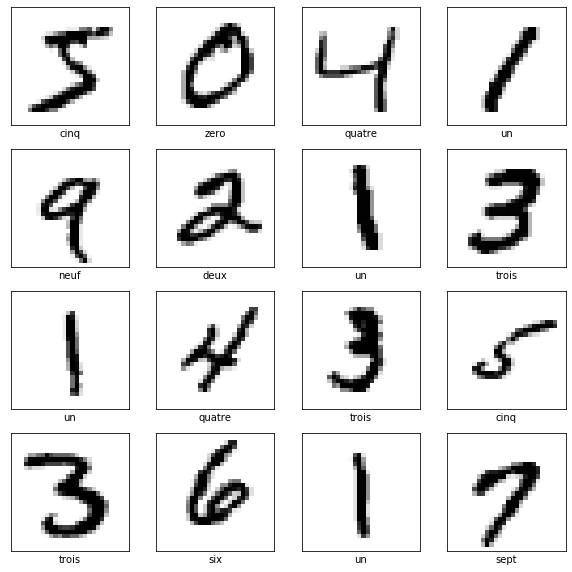

In [5]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
IMG_SIZE = (28, 28, 1)
input_img = layers.Input(shape=IMG_SIZE)

model = layers.Conv2D(32, (3, 3), padding='same')(input_img)
model = layers.Activation('relu')(model)
model = layers.Conv2D(32, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)

model = layers.GlobalAveragePooling2D()(model)
model = layers.Dense(32)(model)
model = layers.Activation('relu')(model)
model = layers.Dense(10)(model)
output_img = layers.Activation('softmax')(model)

model = models.Model(input_img, output_img)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0     

In [7]:
#on convertit les imageds en flottant et on divise par 255 (nombres de niveaux de gris) pour normaliser
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [8]:
adam = optimizers.Adam(lr=0.0001)
model.compile(adam, loss='categorical_crossentropy', metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.7591 - accuracy: 0.7524 - val_loss: 0.2496 - val_accuracy: 0.9301
Epoch 2/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2411 - accuracy: 0.9300 - val_loss: 0.1521 - val_accuracy: 0.9574
Epoch 3/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.1698 - accuracy: 0.9513 - val_loss: 0.1662 - val_accuracy: 0.9551
Epoch 4/10
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1359 - accuracy: 0.9600 - val_loss: 0.1248 - val_accuracy: 0.9634
Epoch 5/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.1089 - accuracy: 0.9674 - val_loss: 0.1095 - val_accuracy: 0.9672
Epoch 6/10
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0945 - accuracy: 0.9712 - val_loss: 0.0783 - val_accuracy: 0.9737
Epoch 7/10
60000/60000 [==============================] 

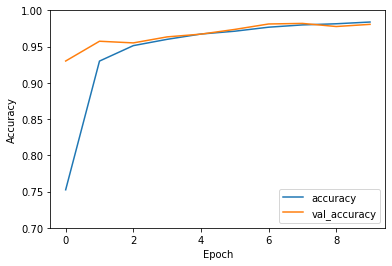

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

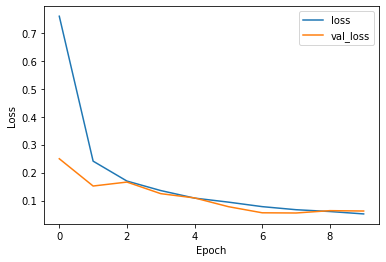

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [12]:
test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy = {0:.2f}%'.format(test_accuracy*100.0))

10000/1 - 3s - loss: 0.0316 - accuracy: 0.9807

Test accuracy = 98.07%


In [116]:
predicted = model.predict(test_images)

In [229]:
# On redimensionne les données sous forme d'images
images = test_images.reshape((-1, 28, 28))

In [236]:
# On selectionne un echantillon de 12 images au hasard
taille=50
select = np.random.randint(images.shape[0], size=taille)

In [237]:
#cette boucle permet de n'afficher que la probabilité la plus grande de la classe 0 à 9
rang=[]
for j in range(taille):
    for i in range(10):
        if (predicted[select[j],i]>0.5)==True :
            rang.append(i)

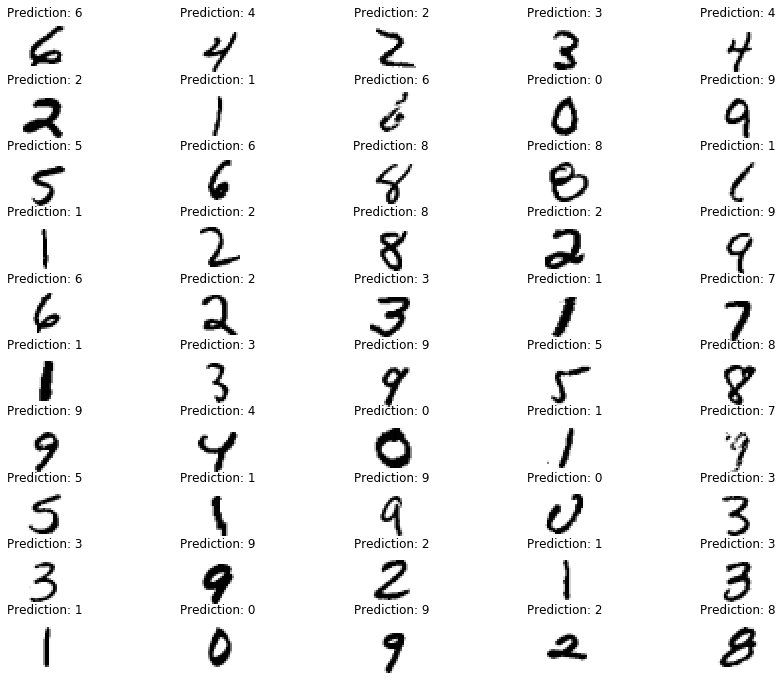

In [239]:
# On affiche les images avec la prédiction associée
plt.figure(figsize=(15,12))
for index, value in enumerate(select):
    plt.subplot(10,5,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Prediction: %s' % rang[index])

plt.show()